Percebemos no ipynb anterior que temos alguns detratores que tem suas reclamações voltados a satisfação com o serviço.

E uma das hipoteses inicias é que esse tipo de insatisfação pode ocorrer realmente por uma falha no atendimento a proposta do serviço\
mas também por um desalinhamento de expectativas do consumidor com a proposta de serviço em si.

Vamos nesse ipynb notebook buscar confirmar que conseguimos perceber esses 2 casos nos perfis dos clientes

In [55]:
import pandas as pd

df = pd.read_csv("data/05_nlp_classificados_topicos.csv")
df_detratores = df[(df["classificacao"]=="Detrator")]

print(df_detratores.shape)
df_detratores.head(2)

(47, 18)


,id,name,age,gender,location,marital_status,qtd_dependents,start_date,churn_date,price,service,tma,data_volume,qtd_appointments,comments,churn,classificacao,topic
0,1,João Silva,35,Masculino,SP,Casado,2,2018-05-10,NaN,79.99,Telefonia Móvel,270.0,2.3,2.0,O serviço de internet tem sido instável. Estou...,False,Detrator,internet_connection
2,3,Carlos Oliveira,42,Masculino,MG,Casado,1,2020-01-20,2021-06-30,139.99,Internet,0.0,0.0,1.0,Tive problemas com a fatura deste mês. O valor...,True,Detrator,atendimento


Não vamos explorar aqui o topico de Atendimento por não ter conexão com o serviço em si

In [56]:
for service in df_detratores["service"].unique():
    print('\n',service)
    for topic in df_detratores["topic"].unique():
        temp_df = df_detratores[(df["service"]==service) & (df_detratores["topic"]==topic)]
        print(f"    {topic}: {temp_df.shape[0]}")


 Telefonia Móvel
    internet_connection: 3
    atendimento: 0
    other: 0
    signal: 0
    critical_appointments: 8

 Internet
    internet_connection: 14
    atendimento: 1
    other: 0
    signal: 0
    critical_appointments: 0

 TV a Cabo
    internet_connection: 0
    atendimento: 7
    other: 4
    signal: 2
    critical_appointments: 0

 Telefonia Fixa
    internet_connection: 0
    atendimento: 2
    other: 0
    signal: 0
    critical_appointments: 6


/tmp/ipykernel_332265/2608124078.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = df_detratores[(df["service"]==service) & (df_detratores["topic"]==topic)]
/tmp/ipykernel_332265/2608124078.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = df_detratores[(df["service"]==service) & (df_detratores["topic"]==topic)]
/tmp/ipykernel_332265/2608124078.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = df_detratores[(df["service"]==service) & (df_detratores["topic"]==topic)]
/tmp/ipykernel_332265/2608124078.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = df_detratores[(df["service"]==service) & (df_detratores["topic"]==topic)]
/tmp/ipykernel_332265/2608124078.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_df = df_detratores[(df["service"]==service) & (df_detratores["topic"]==top

Vamos explorar na ordem apresentada

### Telefonia Movel

In [57]:
df_detrator_mobile = df_detratores[df_detratores["service"]=="Telefonia Móvel"]
for comment in df_detrator_mobile["comments"].unique():
    print(comment,'\n')

O serviço de internet tem sido instável. Estou tendo dificuldades para realizar videochamadas e assistir a filmes online. A velocidade da conexão é muito lenta e cai com frequência. 

O sinal de internet no meu bairro é muito fraco. Não consigo usar os aplicativos de streaming sem enfrentar interrupções constantes. 

O serviço de telefonia móvel é absolutamente horrível. As chamadas caem o tempo todo, a qualidade do som é péssima e a internet é lenta. Não há nada positivo para se dizer sobre essa empresa. Fuja dela! 

A telefonia móvel dessa empresa é uma piada de mau gosto. As chamadas não funcionam adequadamente, a qualidade do som é péssima e a cobertura é praticamente inexistente em muitas áreas. É uma completa perda de dinheiro e tempo. 

A telefonia móvel dessa empresa é um completo desastre. As chamadas não são completadas, o som é horrível e a cobertura é péssima. É uma completa perda de dinheiro e tempo. Não recomendo de forma alguma. 

A telefonia móvel dessa empresa é um ver

Aqui temos algumas coisas interessantes, é possivel notar que nessa secção temos reclamões de 2 tipos:
1. Internet Movel
2. Chamadas e Cobertura

Pro primeiro caso, temos 2 clientes que reclamam de não conseguirem assitir streamings e assistir filmes online\
Que são atividades bem custosas

Já para o segundo, temos varias pessoas apontando problemas de sinal e qualidade do som.


Vamos olhar mais afundo os 2 casos

In [58]:
df_detrator_mobile[(df['topic']=='internet_connection')].head(2)

/tmp/ipykernel_332265/2804606702.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_detrator_mobile[(df['topic']=='internet_connection')].head(2)


,id,name,age,gender,location,marital_status,qtd_dependents,start_date,churn_date,price,service,tma,data_volume,qtd_appointments,comments,churn,classificacao,topic
0,1,João Silva,35,Masculino,SP,Casado,2,2018-05-10,NaN,79.99,Telefonia Móvel,270.0,2.3,2.0,O serviço de internet tem sido instável. Estou...,False,Detrator,internet_connection
5,1001,Renata Costa,32,Feminino,SP,Casado,1,2020-07-10,NaN,89.99,Telefonia Móvel,192.0,1.8,0.0,O sinal de internet no meu bairro é muito frac...,False,Detrator,internet_connection


Vamos entender se o volume de dados desses 2 clientes é maior do que o esperado:

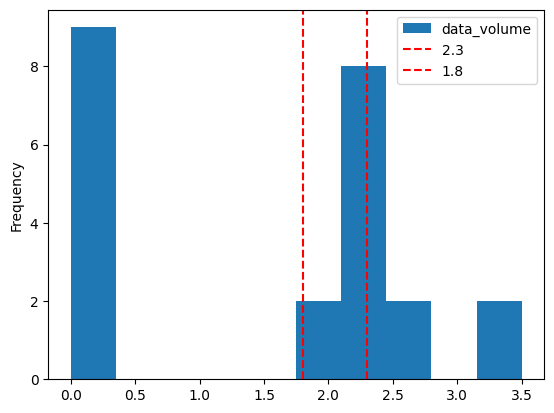

In [59]:
import matplotlib.pyplot as plt
df[df['service']=='Telefonia Móvel']['data_volume'].plot(kind='hist')

plt.axvline(x=2.3, color='red', linestyle='--', label='2.3')
plt.axvline(x=1.8, color='red', linestyle='--', label='1.8')
plt.legend()
plt.show()

Nenhum dos dois clientes parecem ter um uso excepcional do serviço a ponto disso realmente ser um problema.

Talvez estejamos vendo um problema regional, já que ambos são de SP, para buscar reforço para essa hipotese, vamos buscar entender a concentração de Detratores de Telefonia Móvel em SP

In [60]:
from utils.nlp_classifier import calcular_nps

calcular_nps(df[df['service']=='Telefonia Móvel'])
print()
nps = calcular_nps(df[(df['service']=='Telefonia Móvel') & (df['location']=='SP')])

Promotores: 9
Detratores: 11
Neutros: 3
NPS: -8.7

Promotores: 2
Detratores: 2
Neutros: 1
NPS: 0.0


O NPS em SP na verdade é até um pouco melhor, vamos ver o que os Promotores dizem sobre o serviço

In [61]:
df_mobile_promotor_sp = df[(df['service']=='Telefonia Móvel') & (df['location']=='SP') & (df['classificacao']=='Promotor')]
df_mobile_promotor_sp

,id,name,age,gender,location,marital_status,qtd_dependents,start_date,churn_date,price,service,tma,data_volume,qtd_appointments,comments,churn,classificacao,topic
15,1011,Isabela Fernandes,27,Feminino,SP,Solteiro,0,2021-08-10,NaN,79.99,Telefonia Móvel,234.0,2.1,0.0,Estou satisfeita com o serviço de telefonia mó...,False,Promotor,internet_connection
43,1039,Amanda Castro,31,Feminino,SP,Solteiro,0,2022-01-05,NaN,109.99,Telefonia Móvel,234.0,1.8,0.0,Estou satisfeita com o serviço de telefonia mó...,False,Promotor,internet_connection


In [62]:
for comment in df_mobile_promotor_sp["comments"].unique():
    print(comment,'\n')

Estou satisfeita com o serviço de telefonia móvel. A cobertura é boa e a internet é rápida. 

Estou satisfeita com o serviço de telefonia móvel. As chamadas são claras e a internet atende às minhas necessidades básicas. O preço também é razoável em comparação com outras operadoras. Recomendo! 



O volume de dados é bem semelhante entre os Promotores e Detratores, no entanto os promotores não citam especificamente o uso para straming e videos na internet movel.

Podemos estar diante de um problema de alinhamento de expectativas.

É importante notar que tratar esse ponto de alguma forma moveria o NPS de telefonia movel de SP de 0 para 80\
Mas teria baixo impacto no NPS da telefonia movel geral saido de -9 para 9

Vamos explorar a reclamação de cobertura e qualidade de audio que foi mais presente para esse serviço

In [63]:
df_detrator_mobile[(df_detrator_mobile['topic']!='internet_connection')]['location'].value_counts()

location
RS    8
Name: count, dtype: int64

In [64]:
df[(df['service']=='Telefonia Móvel') & (df['location']=='RS') & (df['classificacao']=='Promotor')]

,id,name,age,gender,location,marital_status,qtd_dependents,start_date,churn_date,price,service,tma,data_volume,qtd_appointments,comments,churn,classificacao,topic
27,1023,Carolina Oliveira,32,Feminino,RS,Solteiro,0,2021-04-12,NaN,109.99,Telefonia Móvel,252.0,2.1,0.0,Estou satisfeita com o serviço de telefonia mó...,False,Promotor,internet_connection
58,1056,Larissa Almeida,29,Feminino,RS,Solteiro,0,2022-06-10,NaN,89.99,Telefonia Móvel,288.0,2.3,0.0,Estou satisfeita com o serviço de telefonia mó...,False,Promotor,internet_connection
63,1062,Luana Almeida,29,Feminino,RS,Solteiro,0,2022-06-10,NaN,89.99,Telefonia Móvel,288.0,2.3,0.0,Estou satisfeita com o serviço de telefonia mó...,False,Promotor,internet_connection


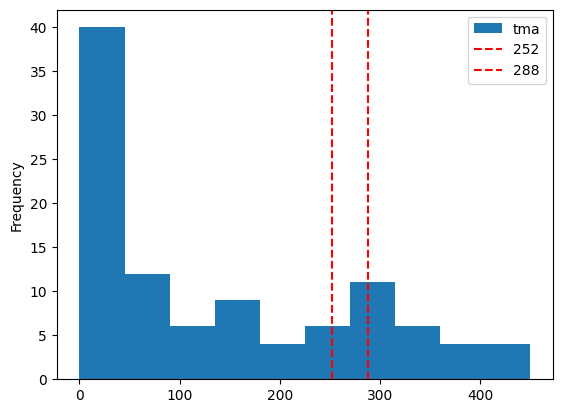

In [65]:
df['tma'].plot(kind='hist')

plt.axvline(x=252, color='red', linestyle='--', label='252')
plt.axvline(x=288, color='red', linestyle='--', label='288')
plt.legend()
plt.show()

Em uma analise inicial percebemos que todos os Detratores que apontam esse problema estao na regional de RS e que os demais clientes da região,\
mesmo que não declarados como Detratores possuem um tempo de atendimento bem alto, o que denota algum desconforto que teve dificuldade de ser tratado

No entando isso pode ser um forte indicio que o atendimento da região de alguma forma conseguiu sanar o desconforto relacionado a essa reclamação

E envolve-los pode apoiar tanto em uma solução provisoria quanto indicar um ponto de partida para a solução do, provavel, problema tecnico da região

Por sua vez a resolução desse problema, impacta bastante positiviamente no NPS:


Telefonia Movel: -9 -> 65 (Saindo da Zona Critica pra beirando a Zona de Qualidade)\
NPS Geral: 1 -> 18

### Internet

In [66]:
df_detrator_internet = df_detratores[df_detratores["service"]=="Internet"].sample(10)
for comment in df_detrator_internet["comments"].unique():
    print(comment,'\n')

A velocidade da internet está abaixo do esperado. Não consigo assistir a vídeos em HD sem interrupções constantes. 

A internet fornecida é simplesmente terrível. A velocidade é lenta, o sinal cai constantemente e o suporte técnico não é capaz de solucionar os problemas. Estou extremamente frustrado com o serviço e planejo cancelá-lo o mais rápido possível. 

Tive problemas com a fatura deste mês. O valor cobrado está incorreto e não consigo entrar em contato com o atendimento ao cliente. Já enviei diversos emails e tentei ligar várias vezes, mas não obtive resposta. 

Estou extremamente insatisfeito com a empresa de internet. A velocidade é extremamente lenta, a conexão cai com frequência e o suporte técnico é inútil. É uma completa perda de tempo e dinheiro lidar com essa empresa. Não recomendo a ninguém. 

Essa empresa de internet é uma completa vergonha. A velocidade é ridícula, a conexão cai o tempo todo e o suporte técnico é ineficiente. É um completo desperdício de dinheiro lida

As reclamações relacionadas a Internet são bem padroes e razoavelmente generias, sempre apontando **Velocidade** e **Estabilidade** como problemas

Vamos explorar as localidades

In [67]:
df_detrator_internet['location'].value_counts()


location
RJ    6
MG    2
SP    2
Name: count, dtype: int64

In [68]:
df[(df['service']=='Internet') & (df['classificacao']=='Promotor')]['location'].value_counts()


location
MG    6
RJ    4
RS    4
SP    2
Name: count, dtype: int64

Em **MG** e **RS** o serviço parece apresentar maior qualidade no entanto **RJ** e **SP** apresentam uma situação mais dividida, vamos aprofundar no perfil dos clientes dessas regiões

In [69]:
df[(df['service']=='Internet') &(df['location'].isin(['SP','RJ']))][['qtd_dependents','price','classificacao']].groupby('classificacao').median()

,qtd_dependents,price
classificacao,,
Detrator,2.0,149.99
Promotor,0.0,114.99


Parece ser comum entre os Detratores tem mais dependentes mesmo que já possuam planos, na média, superiores aos Promotores\
a qualidade do serviço parece não atender esses clientes.

Um estudo mais aprofundado nesses casos podem trazer mais insights como:\
Será que essa instabilidade é na casa toda?\
Será que existem periodos que a instabilidade é mais marcante?

Aqui vejo uma ótima oportunidade de cross-selling (pensando em mesh para maior cobertura na casa)\
Ou soluções baseadas em educar nosso cliente\
(será que priorizar a navegação dos dispositivos do cliente sobre os dos dependentes, torna a percepção do serviço melhor?)

In [70]:
nps = calcular_nps(df[(df['service']=='Internet')])

Promotores: 16
Detratores: 15
Neutros: 0
NPS: 3.23



Internet: 3 -> 61 (Saindo da Zona de aperfeiçoamento para a Zona de Sucesso)\
NPS Geral: 1 -> 18 (Pensando nessa ação de forma individual)

### Telefonia Fixa

Obs.: Pulamos o serviço de TV por suas reclamações serem mais focadas em atendimento, que trataremos em outro ipynb

In [74]:
df_detrator_fixa = df_detratores[df_detratores["service"]=="Telefonia Fixa"]
for comment in df_detrator_fixa["comments"].unique():
    print(comment,'\n')

Estou profundamente insatisfeita com o serviço de telefonia fixa. As ligações são constantemente interrompidas, e a qualidade do som é péssima. Além disso, o atendimento ao cliente é ineficiente e não resolve meus problemas. Não recomendo essa empresa de forma alguma. 

O serviço de telefonia fixa dessa empresa é um verdadeiro desastre. As ligações são constantemente cortadas, o som é horrível e o atendimento ao cliente é simplesmente inútil. É uma experiência frustrante e não vale o dinheiro investido. 

O serviço de telefonia fixa dessa empresa é um verdadeiro pesadelo. As ligações caem o tempo todo, o som é terrível e o suporte técnico é ineficiente. É uma experiência frustrante e desgastante lidar com essa empresa. 

O serviço de telefonia fixa dessa empresa é uma completa piada. As ligações são constantemente cortadas, o som é horrível e o suporte técnico não resolve nada. É uma experiência frustrante e não recomendo a ninguém. 

O serviço de telefonia fixa dessa empresa é uma ver

As reclamações aqui se assemelham bastante ao que vimos na telefonia movel, será que é o mesmo problema?

Vamos olhar a regional

In [75]:
df_detrator_fixa['location'].value_counts()

location
MG    7
RJ    1
Name: count, dtype: int64

Não é na mesma regional (RS), mas segue parecendo um problema semelhante, vamos seguir com a mesma analise

In [77]:
df[(df['service']=='Telefonia Fixa') & (df['location']=='MG') & (df['classificacao']=='Promotor')]

,id,name,age,gender,location,marital_status,qtd_dependents,start_date,churn_date,price,service,tma,data_volume,qtd_appointments,comments,churn,classificacao,topic
26,1022,Ricardo Fernandes,45,Masculino,MG,Casado,3,2017-08-01,NaN,189.99,Telefonia Fixa,414.0,0.0,0.0,O serviço de telefonia fixa atende às minhas n...,False,Promotor,internet_connection
40,1036,Rodrigo Fernandes,46,Masculino,MG,Casado,3,2017-08-01,NaN,189.99,Telefonia Fixa,414.0,0.0,0.0,O serviço de telefonia fixa atende às minhas n...,False,Promotor,internet_connection


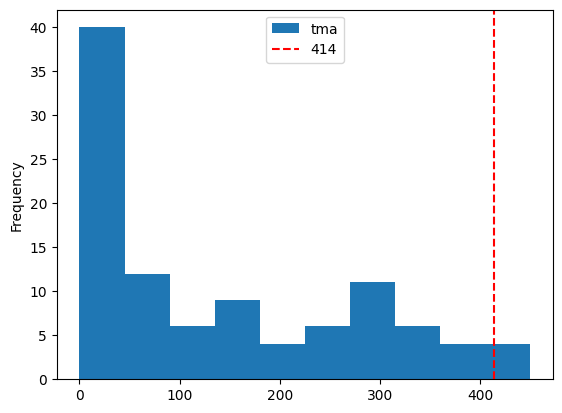

In [78]:
df['tma'].plot(kind='hist')

plt.axvline(x=414, color='red', linestyle='--', label='414')
plt.legend()
plt.show()

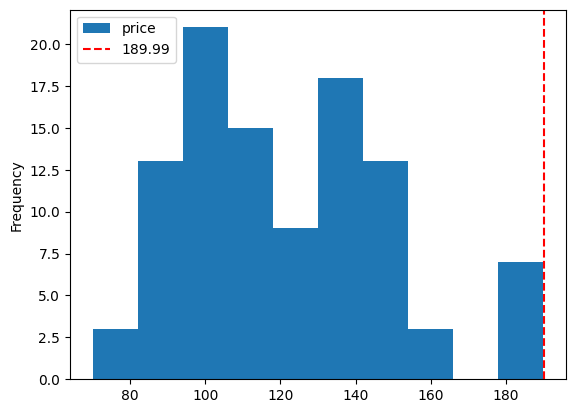

In [79]:
df['price'].plot(kind='hist')

plt.axvline(x=190, color='red', linestyle='--', label='189.99')
plt.legend()
plt.show()

In [81]:
df[(df['service']=='Telefonia Fixa') & (df['location']=='MG')][['tma','price','classificacao']].groupby('classificacao').median()

,tma,price
classificacao,,
Detrator,144.0,99.99
Promotor,414.0,189.99


Vejo varias semelhanças, temos também promotores do serviço na região com um TMA bem alto e também chama atenção o preço.

Aqui mais uma vez podemos estar diante de um desalinhamento da expectativa da qualidade do produto,\
já que os Promotores utilizam de produtos mais topo de linha

In [82]:
nps = calcular_nps(df[(df['service']=='Telefonia Fixa')])

Promotores: 14
Detratores: 8
Neutros: 1
NPS: 26.09


Telefonia Fixa já é um dos carros chefe da empresa, mas resolver esse problema moveria o NPS:

Telefonia Fixa: 26 -> 86 (Saindo da Zona de Aperfeiçoamento, beirando a Zona de Excelencia)\
NPS Geral: 1 -> 14

Ao longo desse IPYNB listamos 3 ações que podem melhorar em muito o NPS individual de cada um dos serviços:

Telefonia Movel: Resolver o problema tecnico em RS sobre qualidade de som, cobertura e falhas (-9 -> 65)\
Internet: Explorar soluções para multiplos usuarios na rede, focado em SP (3 -> 61)\
Telefonia Fixa: Investigar o problema tecnico em MG sobre qualidade de som e falhas propor upselling (26 -> 86)

E se todas essas ações forem implatadas com sucesso:\
NPS Geral: 1 -> 50 

(25D->P)